In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#folder shortcut
path = r'C:\Users\cook family\Desktop\Citi_Bike'

In [3]:
citibike = pd.read_csv(os.path.join(path, '02 Data' , 'prepared data' , 'citi_6.csv'), index_col = False)

In [4]:
# Import orders_products_combined
citibike = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'citibike6.6.pkl'))

# Wrangling subsets

In [5]:
citibike.head()

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,2023-10-20 18:35:00
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,2023-10-20 18:48:00
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,2023-10-20 19:50:00
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,2023-10-20 12:03:00
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,2023-10-20 22:08:00


In [6]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   day_of_the_week          42993 non-null  object        
 2   start_hour               42993 non-null  int64         
 3   start_station_id         42993 non-null  int64         
 4   start_station_name       42993 non-null  object        
 5   start_station_latitude   42993 non-null  float64       
 6   start_station_longitude  42993 non-null  float64       
 7   end_station_id           42993 non-null  int64         
 8   end_station_name         42993 non-null  object        
 9   end_station_latitude     42993 non-null  float64       
 10  end_station_longitude    42993 non-null  float64       
 11  trip_duration            42993 non-null  int64         
 12  subscriber               42993 n

In [7]:
#ride numbers by day
day_counts = citibike.groupby( citibike['ride_start_date'].dt.date)['ride_start_date'].count()

In [8]:
day_counts

ride_start_date
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: ride_start_date, dtype: int64

In [9]:
#avg trip duration 
avg_ride_duration_day = citibike.groupby('ride_start_date')['trip_duration'].mean()

In [10]:
avg_ride_duration_day

ride_start_date
2013-09-01    835.948586
2013-09-02    751.578735
2013-09-03    762.576951
2013-09-04    788.075178
2013-09-05    782.700348
2013-09-06    770.536137
2013-09-07    828.083817
2013-09-08    836.929519
2013-09-09    795.318763
2013-09-10    754.354800
2013-09-11    728.728418
2013-09-12    744.394718
2013-09-13    756.957084
2013-09-14    788.970906
2013-09-15    811.159806
2013-09-16    746.375744
2013-09-17    742.269602
2013-09-18    757.105294
2013-09-19    745.649327
2013-09-20    757.693303
2013-09-21    781.492671
2013-09-22    806.885816
2013-09-23    757.755299
2013-09-24    742.678819
2013-09-25    778.845146
2013-09-26    733.993111
2013-09-27    772.560853
2013-09-28    816.695260
2013-09-29    785.908778
2013-09-30    751.789316
Name: trip_duration, dtype: float64

In [11]:
#merging ride_count and trip_duration
answer = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [12]:
answer

,date,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


In [13]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [14]:
# Change "Date" dateframe to index
from datetime import datetime
answer['datetime'] = pd.to_datetime(answer['date']) 
answer = answer.set_index('datetime') 
answer.drop(['date'], axis=1, inplace=True) 
answer.head()

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348


# I started sorting the beginning dates in the spreadsheet to have a better idea of where things go from there.

In [15]:
# Change "Date" columns dataframe to a filter
answer_2 = answer.reset_index()

In [16]:
answer_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348


In [17]:
answer_3 = answer_2[['datetime','ride_count']]

In [18]:
answer_3

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


In [19]:
# Change "Date" column dataframe to a filter
answer_3 = answer.reset_index()

In [20]:
answer_3

,datetime,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


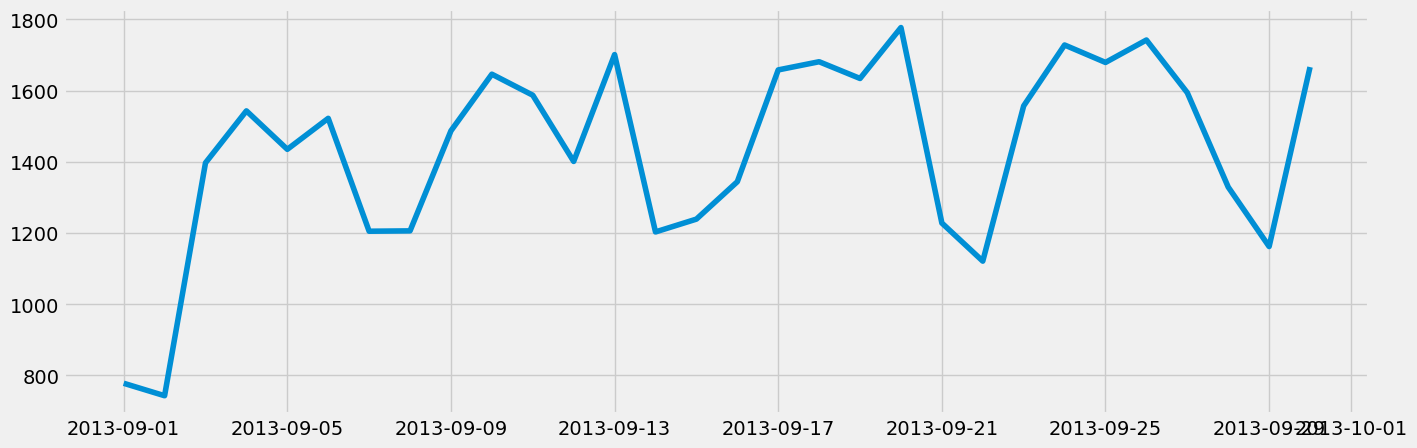

In [21]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

In [22]:
day_counts

ride_start_date
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: ride_start_date, dtype: int64

In [23]:
# Check for missing values 
day_counts.isnull().sum() 

0

# Time Series Analysis

In [24]:
answer

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348
2013-09-06,1522,770.536137
2013-09-07,1205,828.083817
2013-09-08,1206,836.929519
2013-09-09,1487,795.318763


In [25]:
# dropping column
column_to_drop = 'avg_duration'

In [26]:
answer = answer.drop(column_to_drop, axis=1)

In [27]:
answer

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


In [28]:
# Change "Date" column dataframe to a filter
answer_1 = answer.reset_index()

In [29]:
answer_1

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


In [30]:
answer_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [31]:
time_series = answer_1['ride_count']

In [32]:
answer_1['datetime'] = pd.to_datetime(answer_1['datetime'])

In [33]:
answer_1.set_index('datetime', inplace=True)

In [34]:
answer_1.index.freq = 'D'

In [35]:
time_series = answer_1['ride_count']

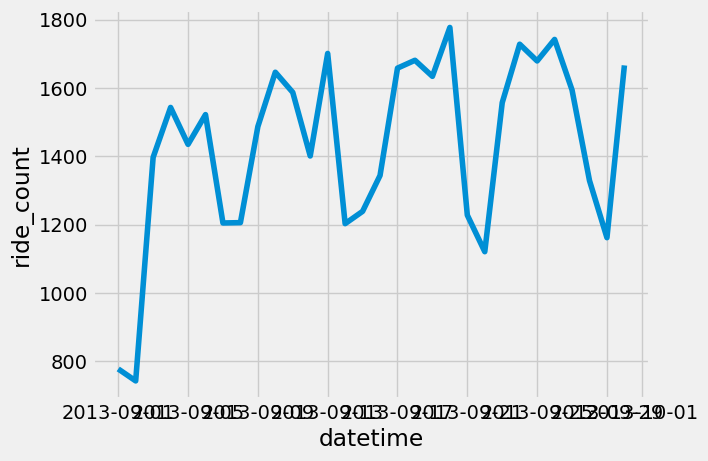

In [36]:
#Creating the line chart
line_2 = sns.lineplot(data = answer_1, x = 'datetime', y = 'ride_count')

In [37]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [38]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

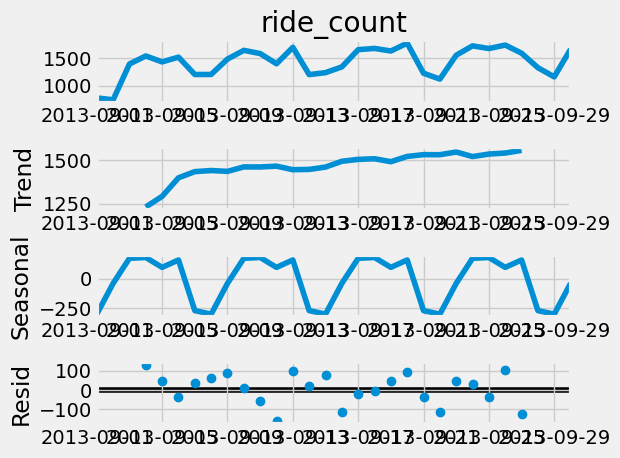

In [39]:
# Plot seasonality to ride count
decomposition.plot()
plt.show()

In [40]:
answer_1

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


# Dickey-Fuller test

In [44]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(answer_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.640922
p-value                         0.005025
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


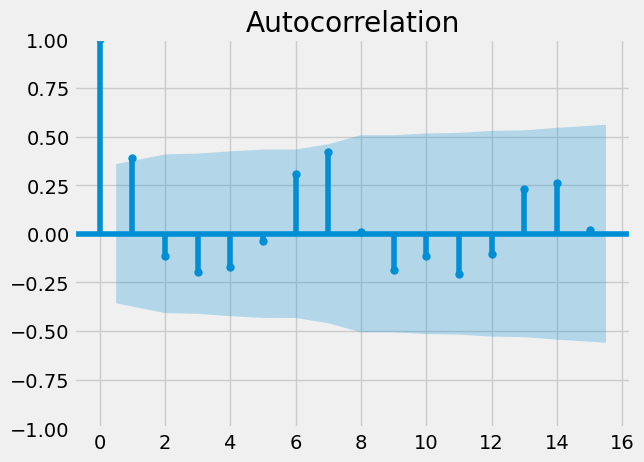

In [42]:
# autocorrelations plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(answer_1)
plt.show()

In [46]:
# saving to csv
citibike.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'))